In [1]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy

def setup_graph(title='', x_label='', y_label='', fig_size=None, grid=True):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.grid(grid)

# What is multiplication?

And how does it differ from addition?

Take the number 6. You can get it by multiplying 2*3. You can also get 6 by adding 3+3, or 2+4, or 1+5. But you can also get from addition 6 in other ways if you use negative numbers such as -2+8. Additionally, you can get 6 from addition in an infinite number of ways of you use consider all real numbers and not just integers... 

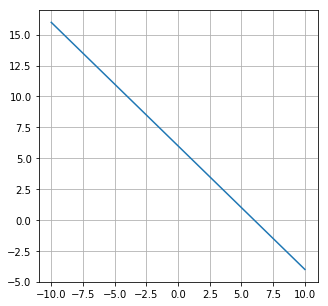

In [4]:
setup_graph(fig_size=(5,5))
x = np.linspace(-10, 10)
y = 6-x
_= plt.plot(x, y)

You could also visualize this if you consider 6 as the distance from the origin like this. Then it could be described as:

|x|+|y| = 6

which would be a circle.

You can also get 6 in many more ways with multiplication if you aren't just looking at real numbers...

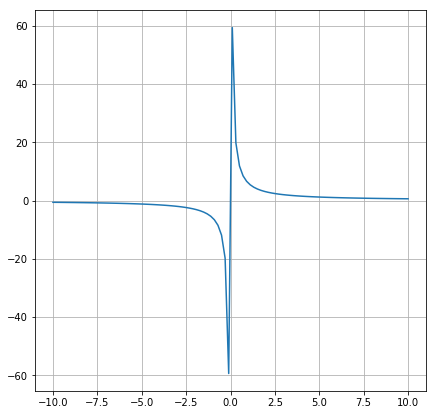

In [14]:
setup_graph(fig_size=(7,7))
x = np.linspace(-10, 10, 100)
y = 6/x
_= plt.plot(x, y)

## Complex multiplication

Now let's introduce complex multiplication. Multiplying a real number by i produces a 90 degree rotation on the complex plane

Here is 3*i - note the 90 degree rotation...

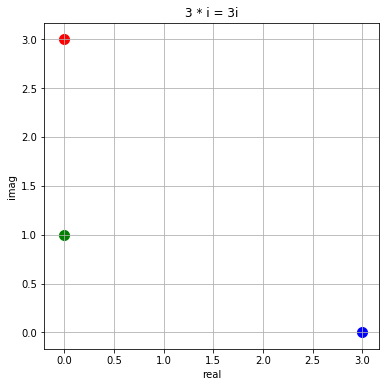

In [28]:
def complex_to_euclidean(c):
    return (c.real, c.imag)

setup_graph(title='3 * i = 3i', x_label='real', y_label='imag', fig_size=(6,6))
a = (3+0j)
b = (0+1j)
a_times_b = a*b
plt.scatter(*complex_to_euclidean(a), color='blue', s=100)
plt.scatter(*complex_to_euclidean(b), color='green', s=100)
plt.scatter(*complex_to_euclidean(a_times_b), color='red', s=100)


Taken in this light, multiplying a real number by a negative real number produces a 180 degree rotation. The strictly real-number line is a 0-sphere, which is composed of just 2 non-connected points, which is why it just "jumps" when multiplying by a negative.

Of course, this also explains why multipying by 2 negatives equals a positive - because you are doing 2 180 degree transformations, which ends up back at the starting place.

Whereas strictly real numbers form a 0-sphere, the complex number plane represents a 1-sphere, which is connected. So we can actually continuously raise to higher and higher powers (which is simply multiplying by i in a continuous fasion) non-integrer powers of i to produce a circle...

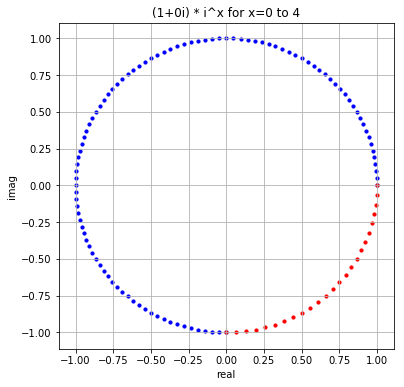

In [53]:
setup_graph(title='(1+0i) * i^x for x=0 to 4', x_label='real', y_label='imag', fig_size=(6,6))
real_num = (1+0j)

# Values of the exponent of i from 0 to 3, which will include i^0, i^1, i^2 (-1), and i^3 (-i)
imag_values = np.linspace(0, 3, 100)
xy = [real_num*((0+1j)**imag_exp) for imag_exp in imag_values]
for c in xy:
    plt.scatter(c.real, c.imag, color='blue', s=10)

# Values of the exponent of i from 3 to 4, which will range from i^3 (-i) to i^4 (+1)
xy2 = [real_num*((0+1j)**imag_exp) for imag_exp in np.linspace(3, 4, 25)]
for c in xy2:
    plt.scatter(c.real, c.imag, color='red', s=10)

## Multiplication spiral

So here's an intersting thought... there should be some spiral such that:
* 2**0 should equal 1
* 2**1 should equal 2
* 2**2 should equal 4
* 2**3 should equal 8

In other words, scaling should happen along with rotating, which sounds like a spiral. In fact, this reminds me of the Archimedes spiral. I hypothesize that this spiral should also hold true for 2**(x+xi). It should also work out for other numbers too. Let's see if I can find the right parameters to produce this spiral...

According to wikipedia, the Archimedes spiral has the equation r = a + b*θ. So let's try to find a and be...

for 2**0:
* 1 = a + b*0, (since θ should be 0 because it should be pointing down the positive side of the real axis)
* 2 = a + b*(2π) (since θ should equal 2π because a one full rotation should have happened at this point)
* 4 = a + b*(4π) (since θ should equal 4π because a two full rotation should have happened at this point)

So just looking at the first equation, it looks like a should equal 1 since 1 = 1 + 0. So then, looking at the second equation:
    2 = 1 + b*(2π)
So
    1/(2π) = b

So the polar equation should be:

r = 1 + (1/(2π)) * θ

Okay, but how do I convert from this polar equation into the complex plane?

Here's some things I know:
* r is the magnitude, which is sqrt(real**2 + imag**2).
* θ should be 0 radians at i^0
* θ should be π/2 at i^1
* θ should be π at i^2 = -1
* θ should be 2π at i^4 = 1

So in the above graph which produces a circle with a radius of 1, the equation was:

(1+0i) * i^x, for x=0 through 4.

So how can I modify this equation to produce a spiral which crosses the real axis at these points?
* θ=0, real=1, imag=0
* θ=2π, real=2, imag=0
* θ=4π, real=4, imag=0

I think I want (2+0j) * (1+0j)^x * (0+1j)^x
* x = 0 -> (2+0j) * (1+0j)^0 = (2+0j)
* x = 1 -> (2+0j) * (1+j)^1 = ?

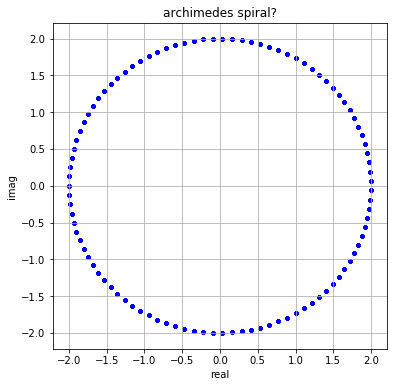

In [100]:
setup_graph(title='archimedes spiral?', x_label='real', y_label='imag', fig_size=(6,6))
real_num = (2+0j)

imag_values = np.linspace(0, 8, 500)
xy = [ real_num * (1+0j)**x * (0+1j)**x for imag_exp in imag_values]
for c in xy:
    plt.scatter(c.real, c.imag, color='blue', s=5)